# Hypothesis Testing for Multiple Groups

### Data Science 410

## Testing Multiple Groups and ANOVA

So far, we have only looked at tests for comparing two samples. What if we have multiple groups and want to compare their means? Why can’t we just do multiple two-sample t-tests for all pairs?
- Results in increased probability of accepting a false hypothesis.
- For example, if we had 7 groups, there would be (7 Choose 2)=21 pairs to test.  If our alpha cutoff is 5%, then we are likely to accept about 1 false hypothesis (approximately 21*0.05).

There is another alternative:

- Null Hypothesis: All groups are samples from the same population.
- Alternative Hypothesis: At least one group has a statistically different mean.

This type of analysis is called “ANalysis Of VAriance”, or ANOVA. ANOVA is one of a large family of models used for **experimental design**.

### Brief History of ANOVA

ANOVA is not a new idea. 

- Laplace pioneered multiple comparison methods in 1827.
- Ronald A Fisher published seminal work in 1922, 1925 and 1935. The F (Fisher) statistic is named in his honor.

Fisher pioneered the use of linear models for testing multiple groups. Key methods he developed are ANOVA and the design of experiments. 

<img src="img/Ronald_Fisher.jpg" alt="Drawing" style="width:275x; height:350px"/>

<center>Ronald A. Fisher, another scary looking statistics professor!</center>   

Fisher had an overwhelming influence on the theory of classical (frequentist) statistics. He was vehemently opposed to Bayesian methods, and ostracized any practitioners. In fact, Fisher's long shadow explains why we are only beginning to teach Bayesian methods in the 21st century. Unfortunately, as with Pearson, Fisher was also a eugenicist and a racist. Another serious blemish on the early history of statistics. 

Fisher's two books are still influential and in print. 

<img src="img/Fisher1.jpg" alt="Drawing" style="width:400x; height:350px"/>

<img src="img/Fisher2.jpg" alt="Drawing" style="width:400x; height:350px"/>

<center>Fisher's books of 1935 and 1925</center>


## Basic ANOVA Theory 

Let's have a look at how we would perform the comparisons between the multiple groups of data. The groups have each been subject to a different treatment. This method is known as **one-way ANOVA**.  

The general idea is to determine if the groups within the data set all have the same variance. In other words, did the different treatments lead to significantly different variances within the groups? 

The differences in variance is measured by the **F statistic**. The F-statistic is defined by the ratio: 

$$F = \frac{Variance\ between\ treatments}{Variance\ within\ treatments}$$  

This ratio will be close to 1.0 if the treatments did exhibit a significant effect. On the other hand, if the treatment has a significant effect on **at least one of the groups**, the F statistic will be $\gt 1$. 

The ratio of variances, or F statistic, follows an F distribution. There are two parameters which are the **degrees of freedom**. The variance between treatments and the variance within treatments each have a different degrees of freedom. For the F distribution of one-way ANOVA the degrees of freedom can be written:

\begin{align}
degrees\ of\ freedom\ between\ treatments\ &= DFT = I - 1 \\
degrees\ of\ freedom\ within\ treatments\ &= DFE = n - I
\end{align}

Where;

\begin{align}
I &= number\ of\ treatments\ or\ groups \\
n &= total\ number\ of\ subjects\ or\ samples
\end{align}

The shape of the F distribution is defined by these two degrees of freedom, as shown in the figure below. Notice how the distribution becomes more symmetric and peaked as the degrees of freedom increases. 

<img src="img/F_Distribution.jpg" alt="Drawing" style="width:300x; height:350px"/>
<center>F distribution for different degrees of freedom</center>

The null distribution is that the treatments have had no significant effect. The p-value is computed and compared to the cutoff value using the F distribution, given the two degree of freedom parameters.  

### Constructing an ANOVA Table

Comparisons between the multiple groups is traditionally laid out using an **ANOVA table**. Here we will construct the elements of this table piece by piece.  

First, we make data independence and Normality assumptions about the groups. Then define:

\begin{align}
I &= number\ of\ treatments\\
n &= number\ of\ data\ or\ samples\\
SS &= sum\ of\ squares
\end{align}

We can calculate the following **sum of squares** quantities:

\begin{align}
SST &= SS\ Treatment\\
SSE &= SS\ Error\ within\ groups\\
SSTotal &= SST + SSE
\end{align}

Further, 

\begin{align}
DFT &= degrees\ of\ freedom\ Treatment = I - 1\\
DFE &= degrees\ of\ freedom\ Error\ within\ groups = n - 1\\
DFTotoal &= DFT + DFE = (I-1) + (n-I) = n -1
\end{align}

And,

\begin{align}
MST &= mean\ square\ error\ Treatment\\
MSE &= mean\ square\ error\ within\ groups
\end{align}

Finally we can compute the F statistic with DFT and DFE degrees of freedom:

$$F = \frac{Variance\ between\ treatments}{Variance\ within\ treatments} = \frac{MST}{MSE} =  \frac{\frac{SST}{DFT}}{\frac{SSE}{DFE}}$$

Using the F statistic on the degrees of freedom we can compute the p-values of the test. Using the significance of the test is determined significance with respect to the cutoff value. We can lay these results out in an ANOVA table as follows:

|Type|Sum of Squares|df|Mean Square E|F|Significance|
|---|---|---|---|---|---|
|Between Groups|SST|DFT|SST/DFT|F Statistic| p-value|
|Within Groups|SSE|DFE|SSE/DFE|||
|Groups Total|SSTotal|DFTotal||||

### ANOVA Example

Let's start with an example with 4 groups. In Fisher's experimental design terminology we say we have data arises from 4 **treatments**. The code in the cell below computes the data for each of the 4 treatments. Run the code in the cell below and examine the difference in the box plots.

In [20]:
import numpy as np
import numpy.random as nr
import pandas as pd
import scipy.stats as ss
import statsmodels.stats.power as ssp

Text(0.5, 1.0, 'Box plot of variables')

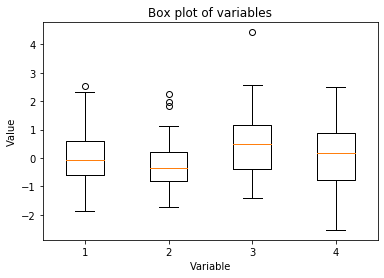

In [21]:
nr.seed(335566)
df1 = nr.normal(size = 50).tolist()
df2 = nr.normal(size = 50).tolist()
df3 = nr.normal(loc = 0.5, size = 60).tolist()
df4 = nr.normal(size = 40).tolist()

import matplotlib.pyplot as plt
plt.boxplot([df1, df2, df3, df4])
plt.ylabel('Value')
plt.xlabel('Variable')
plt.title('Box plot of variables')

The plot shows variation between the distributions of the four variables. The question is, are these differences significant. 

The code in the cell below applies uses the [scipy.stats.f_oneway](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html) function, to perform the one-way ANOVA on the data from the 4 treatment groups. This function computes an F-Statistic and a p-value. Run this code and examine the results. 

In [22]:
f_statistic, p_value = ss.f_oneway(df1, df2, df3, df4)
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

F statistic = 4.770281688280018
P-value = 0.003120305920760558


The F-Statistic is fairly large and the p-value is small. We can reject the null hypothesis that the 4 variables have the same mean. These treatment groups are unlikely to have arisen from the null distribution that all treatments had no effect. 

### Power of the Test

There is also the question of the power of this ANOVA test. In other words, what is the probability that we will detect a difference in means? 

The code in the cell below uses the [statsmodels.stats.power.FTestAnovaPower.solve_power](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.FTestAnovaPower.solve_power.html) function to compute power for mean differences in the range $\{ 0.1, 1.0 \}$. The power is plotted  against the mean difference. To be conservative, we are using the smallest number of samples for the variables as the number of observations, nobs. Execute this code.

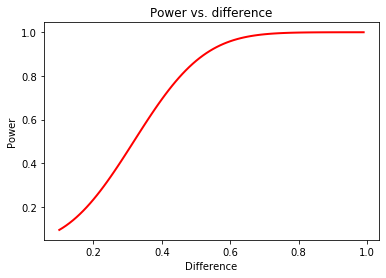

In [23]:
def plot_power(x, y, xlabel, title):
    plt.plot(x, y, color = 'red', linewidth = 2)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Power')

diffs = np.arange(start = 0.1, stop = 1.0, step = 0.01) 
powers = ssp.FTestAnovaPower().solve_power(effect_size = diffs, nobs=40, alpha=0.05)
plot_power(diffs, powers, xlabel = 'Difference', title = 'Power vs. difference') 

You can see that even with 40 observations, the probability of detecting a farily small difference in means between the groups is quite high. 

**Your turn:** In a hypothetical example, a new manager at an auto dealership observes changes in the average daily total sales by day of the week. She has collected the daily sales data by day for the past 8 weeks. She wants to know if these differences are significant or just from random variation?

To solve the problem you will do the following:
1. Execute the code in the cell provided below to compute some simulated data values by day of the week and display a box plot. The parameters for the Normal distributions for each day of the week are based on the average sales for each day and the standard deviation of sales over the month. 
2. In the next cell compute and display the F-Statistic and p-value for this sample. Is this p-value significant with a 0.05 cutoff? 
3. Compute the power of this test with the  following parameters:
  - Range of differences from 1.0 to 10 in steps of 0.1. 
  - To display the plot of power vs. dollars, you must scale these differences by 10,000, the scale of the Normal distribution. Do this after you have computed the power values. This process is necessary since the manager will want to see the results in units she understands, dollars. 

Text(0.5, 1.0, 'Box plot of variables')

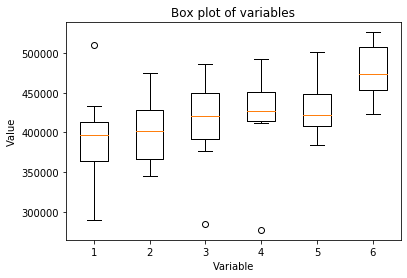

In [50]:
nr.seed(3356)
Mon = nr.normal(loc = 400000, scale = 50000, size = 8).tolist()
Tue = nr.normal(loc = 405000, scale = 50000, size = 8).tolist()
Wed = nr.normal(loc = 415000, scale = 50000, size = 8).tolist()
Thr = nr.normal(loc = 420000, scale = 50000, size = 8).tolist()
Fri = nr.normal(loc = 440000, scale = 50000, size = 8).tolist()
Sat = nr.normal(loc = 455000, scale = 50000, size = 8).tolist()

import matplotlib.pyplot as plt
plt.boxplot([Mon,Tue,Wed,Thr,Fri,Sat])
plt.ylabel('Value')
plt.xlabel('Variable')
plt.title('Box plot of variables')

In [51]:
f_statistic, p_value = ss.f_oneway(Mon,Tue,Wed,Thr,Fri,Sat)
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

F statistic = 2.498871225498271
P-value = 0.04548200683883256


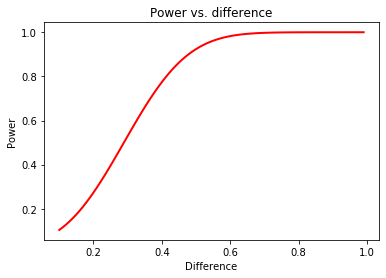

In [55]:
diffs = np.arange(start = 0.1, stop = 1, step = .01) 
powers = ssp.FTestAnovaPower().solve_power(effect_size = diffs, nobs=48, alpha=0.05)
plot_power(diffs, powers, xlabel = 'Difference', title = 'Power vs. difference') 

Eamine the results of you analysis and answer the following questions:
1. Is the difference between the sales on the different days statistically significant at the 95% level? 
2. For a price difference of \$60,000 what is the approximate power of this test? 

### Turkey's ANOVA: Telling Groups Apart

From the above ANOVA results we know that there is some difference in the means of these variables. However, the ANOVA does not tell us which variable is significantly different. From the box plot, we could guess it that group 3 is different, but we really don't know.

John Tukey proposed a test, which he dubbed the HSD, or Honest Significanat Differences, test. The test exaustively computes the following for each pair of groups:
- Difference of the means
- Confidence interval of the difference in the means
- A p-value from the distribution of the differences

These results are laid out in a table or can be plotted graphically. Only differences in means with a confidence interval not overlapping zero are considered significant.

The cells below contain the code to compute the Tukey HSD for the example. The code uses the `pairwise_tukeyhsd` function from the `statsmodels.stats.multicomp` package. Run this code and examine the results to determine which differences are significant?

In [25]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
df = pd.DataFrame({'vals': df1 + df2 + df3 + df4,
                   'group_num': ['1'] * 50 + ['2'] * 50 + ['3'] * 60 + ['4'] * 40})
Tukey_HSD = pairwise_tukeyhsd(df.vals, df.group_num)
print(Tukey_HSD)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2  -0.3237  0.436 -0.8799 0.2325  False
     1      3   0.4386 0.1459 -0.0939 0.9711  False
     1      4    -0.04    0.9 -0.6299 0.5499  False
     2      3   0.7623 0.0015  0.2298 1.2948   True
     2      4   0.2837 0.5867 -0.3062 0.8736  False
     3      4  -0.4786 0.1309 -1.0463  0.089  False
---------------------------------------------------


Examine the table above. If the difference in means between the variables is significant, the confidence interval will not include 0. Which, pairs have a significant difference at the 95% confidence level? You can see the results of this test in the left most column of the table. 

The `plot_simultaneous` method for a `pairwise_tukeyhsd` object allows you to create a plot of the test results. Plot these figures and examine the results.

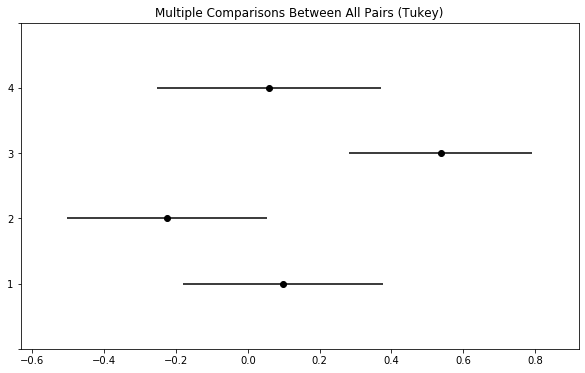

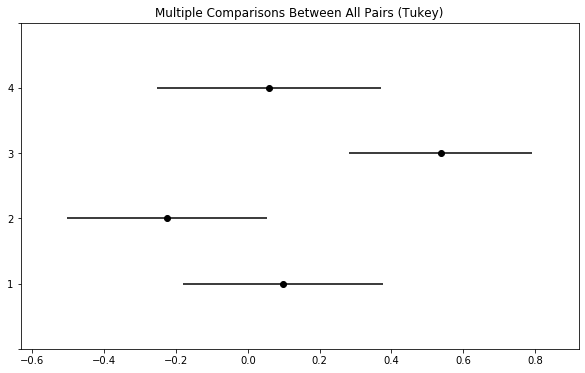

In [26]:
Tukey_HSD.plot_simultaneous()

Examine the plot above. There is a line with a dot shown for each variable. The dot is the mean and the line shows the range of the confidence interval for  that mean. If the difference in means is significant at the confidence level, the confidence intervals will not overlap. Which, pairs in the above plot have a significant difference at the 95% confidence level?

**Your turn:** It would be useful for the manager of the auto dealership understand which days of the week have significantly different average sales at the 95% confidence level. To solve this problem do the following:
1. Compute and print the results of the Tukey HSD test using the `pairwise_tukeyhsd` function. To do so, you will need to first create a list of sales data by concatenating the sales by day of the week using the `numpy.concatenate` function, and then apply the `flatten` method. Since these values are Numpy arrays you cannot use the `+` operator for concatenation. You will also need a list of days of the week, which can be created using the normal multiplication, `*`, and concatenation, `+` operators. 
2. Use the `plot_simultneous` method on your model object to display the confidence intervals of the means. 

Which four pairs days of the week are statistically different at the 95% confidence level? 

## Summary

We have covered lot of ground in this lesson. Specifically we have discussed:

- Mean comparison tests in the form of the t-test. In this case, the null hypothesis is that there is no significant difference in means and the samples are from the same popuolation.  
- The $\chi$-squared test for count data. The null hypothesis is that there is no significant differences in the countsand the samples are from the same popuolation. 
- Distribution comparison tests in the form of the K-S test. The null hypothesis is that the two distributions are the same. 
- Variance comparison test for multiple grouped in the form of ANOVA. The null hypothesis is that there are no differences in the variances of the samples and they are all from the same population. 
- The meaning of the p-value or significance level. A p-value is the probability of obtaining an effect at least as extreme as the one in your sample data, assuming the null hypothesis is true.
- Power of tests. The power of a test is the probability of getting a positive result when the null hypothesis is not true. 
- Multiple compairison issues with applying tests to big data problems. 

#### Copyright 2017, 2018, 2019, 2020, Stephen F Elston. All rights reserved.